# Introduction

The dataset is part of the SPSS v23 package. It contains information about a test taken by some students. It includes features such as school setting, school type, gender, and pre-test scores. The goal of the project is to predict students' test scores using machine learning algorithms. The following algorithms were used in this project: Linear Regression, Support Vector Machine, Decision Tree.

Import bibliotek

In [ ]:
pip install ydata_profiling

In [ ]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Preliminary data analysis

## Data size

* Number of records (rows)
* Number of features (columns)

In [ ]:
test_scores = pd.read_csv('test_scores.csv') #data import

In [ ]:
test_scores.shape # shape of data

(2133, 11)

The dataset contains 2,133 rows and 11 columns.

## Manual review of examples



In [ ]:
test_scores.head() # display the first 5 rows

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [ ]:
test_scores.tail() # display the last 5 rows

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
2128,ZOWMK,Urban,Public,ZBH,Standard,30.0,T8LSK,Female,Does not qualify,39.0,55.0
2129,ZOWMK,Urban,Public,ZBH,Standard,30.0,VNP26,Female,Qualifies for reduced/free lunch,38.0,46.0
2130,ZOWMK,Urban,Public,ZBH,Standard,30.0,YDR1Z,Female,Qualifies for reduced/free lunch,45.0,51.0
2131,ZOWMK,Urban,Public,ZBH,Standard,30.0,YUEIH,Male,Qualifies for reduced/free lunch,46.0,53.0
2132,ZOWMK,Urban,Public,ZBH,Standard,30.0,ZVCQ8,Male,Qualifies for reduced/free lunch,41.0,48.0


In [ ]:
test_scores.sample(10) # display 10 random samples. We can see that the data is diverse.

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
870,IDGFP,Urban,Non-public,98D,Experimental,21.0,HHYKH,Female,Does not qualify,79.0,99.0
1124,LAYPA,Rural,Public,J8J,Standard,19.0,GWG8B,Male,Does not qualify,59.0,67.0
1094,KZKKE,Rural,Public,QTU,Standard,23.0,WZ0HB,Male,Qualifies for reduced/free lunch,32.0,41.0
2019,ZOWMK,Urban,Public,CII,Standard,27.0,5YI2B,Female,Qualifies for reduced/free lunch,47.0,55.0
1338,QOQTS,Urban,Public,X2O,Experimental,25.0,3TPE1,Male,Does not qualify,63.0,76.0
1679,UUUQX,Suburban,Non-public,SSP,Standard,15.0,Q7ZIU,Female,Does not qualify,69.0,75.0
31,ANKYI,Urban,Non-public,ZNS,Standard,21.0,HRZOJ,Female,Does not qualify,66.0,71.0
1760,VKWQH,Rural,Public,D33,Standard,21.0,H2AGT,Male,Qualifies for reduced/free lunch,59.0,73.0
2089,ZOWMK,Urban,Public,QA2,Standard,30.0,FPUKO,Female,Qualifies for reduced/free lunch,38.0,52.0
303,CUQAM,Urban,Public,OMI,Standard,28.0,TNGFN,Male,Does not qualify,57.0,63.0


## Distribution of feature values

 * Value ranges
 * Distributions
 * Reasonableness of the data
 * Basic statistical parameters (mean, median, percentiles, variance).

In [ ]:
test_scores.info() #display type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [ ]:
test_scores.describe() # numerical variable statistics

,n_student,pretest,posttest
count,2133.000000,2133.000000,2133.000000
mean,22.796531,54.955931,67.102203
std,4.228893,13.563101,13.986789
min,14.000000,22.000000,32.000000
25%,20.000000,44.000000,56.000000
50%,22.000000,56.000000,68.000000
75%,27.000000,65.000000,77.000000
max,31.000000,93.000000,100.000000


In [ ]:
profile = ProfileReport(test_scores, title="Profiling Report") # Profiler Report  is used for automated data exploration and generating reports that include detailed descriptive statistics, visualizations, and information about the distributions of variables in the dataset.

In [ ]:
%%time
profile

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Description of Report

**Variable Types**

* Numeric Variables: n_student, prestest, posttest
* Categorical Variables: school, school_setting, school_type, teaching_method, gender, lunch
* Text Variables: classroom, student_id
* Missing Values: There are no missing values in the dataset.
* Duplicate Records: There are no duplicate records.

**Analysis of Key Variables**


1.   School
* Distinct Categories: 23 different schools are represented.
* Top Categories: The most frequent school codes are "GOOBU" (158 occurrences) and "QOQTS" (149 occurrences).

2.   School Setting

* Distinct Categories: 3 (Urban, Suburban, Rural).
* Distribution: Urban (906), Suburban (717), Rural (510).
3. School Type

* Distinct Categories: 2 (Public, Non-public).
* Distribution: Public (1582), Non-public (551).
* Imbalance: A notable imbalance with a much higher representation of public schools.
* Chi-Squared Test: Very significant, suggesting that the distribution is non-random.
4. Classroom

* Distinct Categories: 97 unique classroom identifiers.
* Top Classrooms: "18K" (31 occurrences), "ZBH" (30 occurrences).
* Chi-Squared Test: Significant results indicate that some classrooms are much more common than others.
5. Teaching Method

* Distinct Categories: 2 (Standard, Experimental).
* Distribution: Standard (1373), Experimental (760).
* Chi-Squared Test: Indicates a significant difference in the frequency of teaching methods.
6. Number of Students

* Distinct Values: 18 different student counts.
* Most Common Values: 22 (264 occurrences), 21 (231 occurrences).
* Statistics: Mean = 22.8, Std Dev = 4.23.
* Distribution: Slight skewness and a moderate range of values (14 to 31 students).
* Minimum value: 14
* Maximum value: 31
7. Gender
* Distinct Categories: 2 (Female, Male)
* Distribution: Female (1056), Male(1077)

8. Student ID

* Distinct IDs: 2133 (each record has a unique student ID).

9. Lunch
* Distinct Categories: 2 ("Does not qualify"
"Qualifies for reduced/free lunch")
* Distribution: "Does not qualify" (1,215 cases)
"Qualifies for reduced/free lunch" (918 cases)

10. Pretest
* Minimum value: 22.0
* Maximum value: 93.0

11. Posttest
* Minimum value: 32.0
* Maximum value: 100.0


**Correlations Between Variables**
The report provides important details regarding correlations between the variables:

1. Correlations Among Numeric Variables:

* Pretest and Posttest: Very high correlation with a value of 0.952.
* Lunch and Pretest: A correlation value of 0.628, indicating a moderate positive relationship.
* Lunch and Posttest: A correlation value of 0.607, also indicating a moderate positive relationship.
2. Correlations Among Categorical Variables:

* Lunch and School: A very high correlation with a value of 0.801, suggesting a strong association between the type of lunch and the school.

These correlations indicate that the variables "lunch," "pretest," and "posttest" are strongly related, particularly the "pretest" and "posttest" variables, which is logical since both refer to student test scores. The "lunch" variable may be indicative of socioeconomic status, which also impacts test outcomes.

# Charts

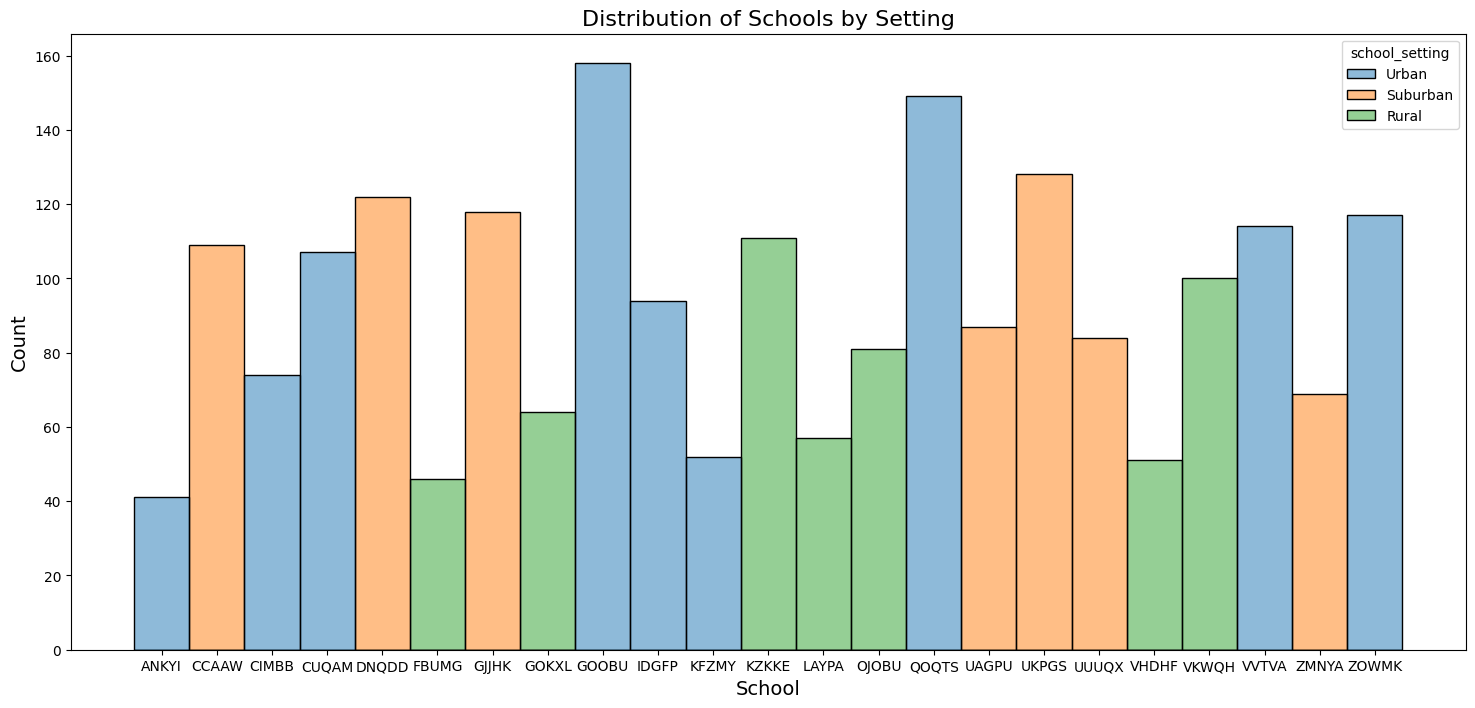

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=test_scores, x='school', hue='school_setting', ax=ax)

# Add labels to the axes
ax.set_xlabel('School', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Schools by Setting', fontsize=16)

# Display the plot
plt.show()

Based on the chart, we can see that there are the most urban schools.

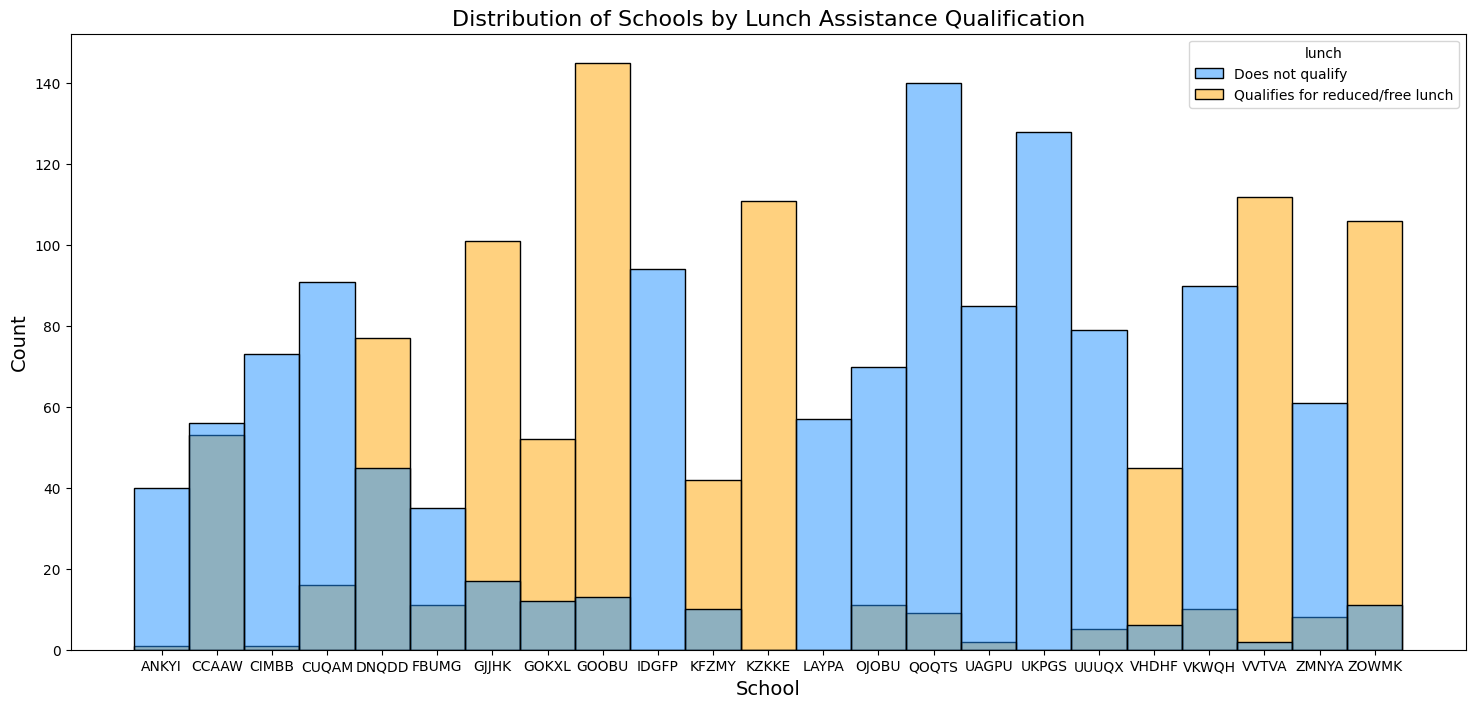

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=test_scores, x='school', hue='lunch', palette=['dodgerblue', 'orange'], ax=ax)

# Add labels to the axes
ax.set_xlabel('School', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Schools by Lunch Assistance Qualification', fontsize=16)

# Display the plot
plt.show()

We can see a variation among schools regarding the qualification of students for meals.

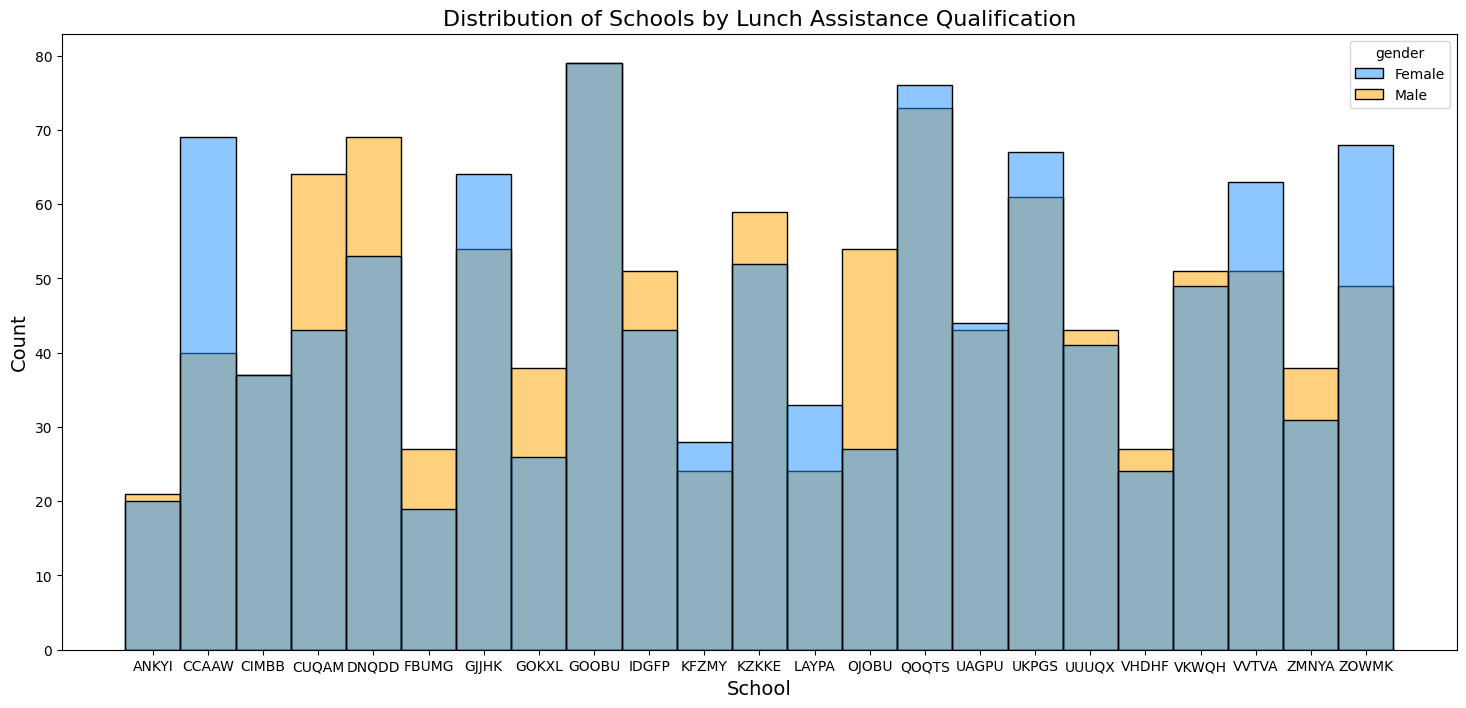

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=test_scores, x='school', hue='gender', palette=['dodgerblue', 'orange'], ax=ax)

# Add labels to the axes
ax.set_xlabel('School', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Schools by Lunch Assistance Qualification', fontsize=16)

# Display the plot
plt.show()

In some schools, more men qualify for meals, while in others, it’s women.

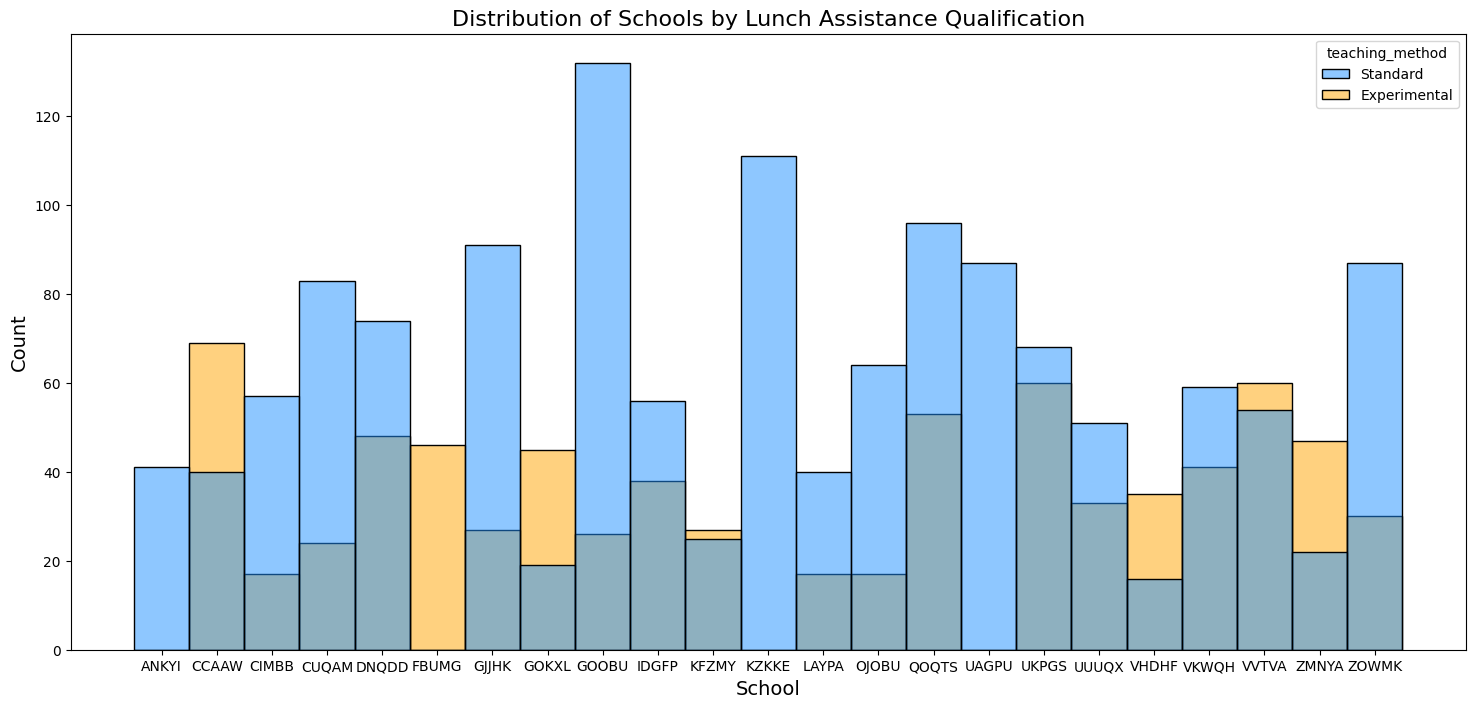

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=test_scores, x='school', hue='teaching_method', palette=['dodgerblue', 'orange'], ax=ax)

# Add labels to the axes
ax.set_xlabel('School', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Schools by Lunch Assistance Qualification', fontsize=16)

# Display the plot
plt.show()

In most schools, the standard method prevails

In [ ]:
teaching_method = test_scores.groupby(['school', 'classroom'])['teaching_method'].value_counts().reset_index() #można nałożyć wykres jeden na drugi wykres gęstości

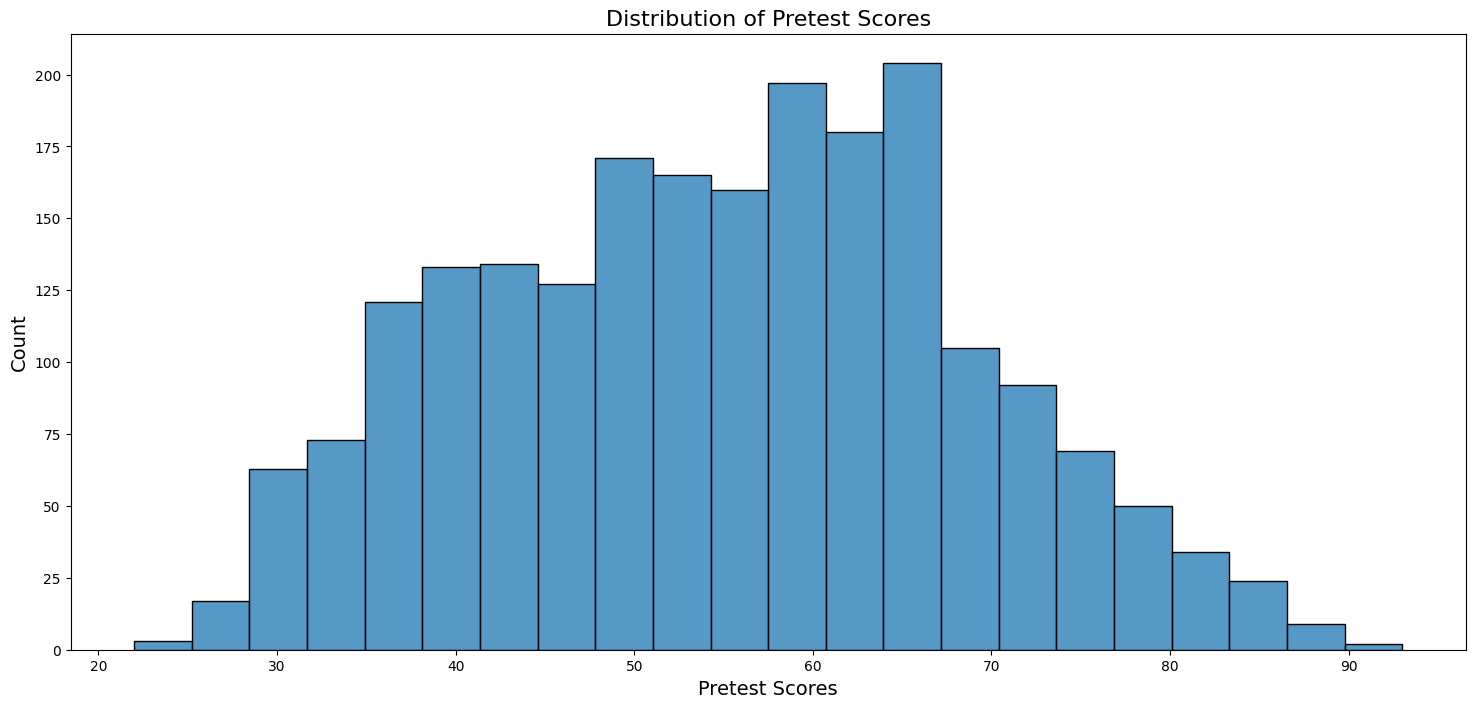

In [ ]:
# Create the plot for pretest scores
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=test_scores, x='pretest', ax=ax)

# Add labels to the axes
ax.set_xlabel('Pretest Scores', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Pretest Scores', fontsize=16)

# Display the plot
plt.show()

The pretest results range from above 20 points to around 100.

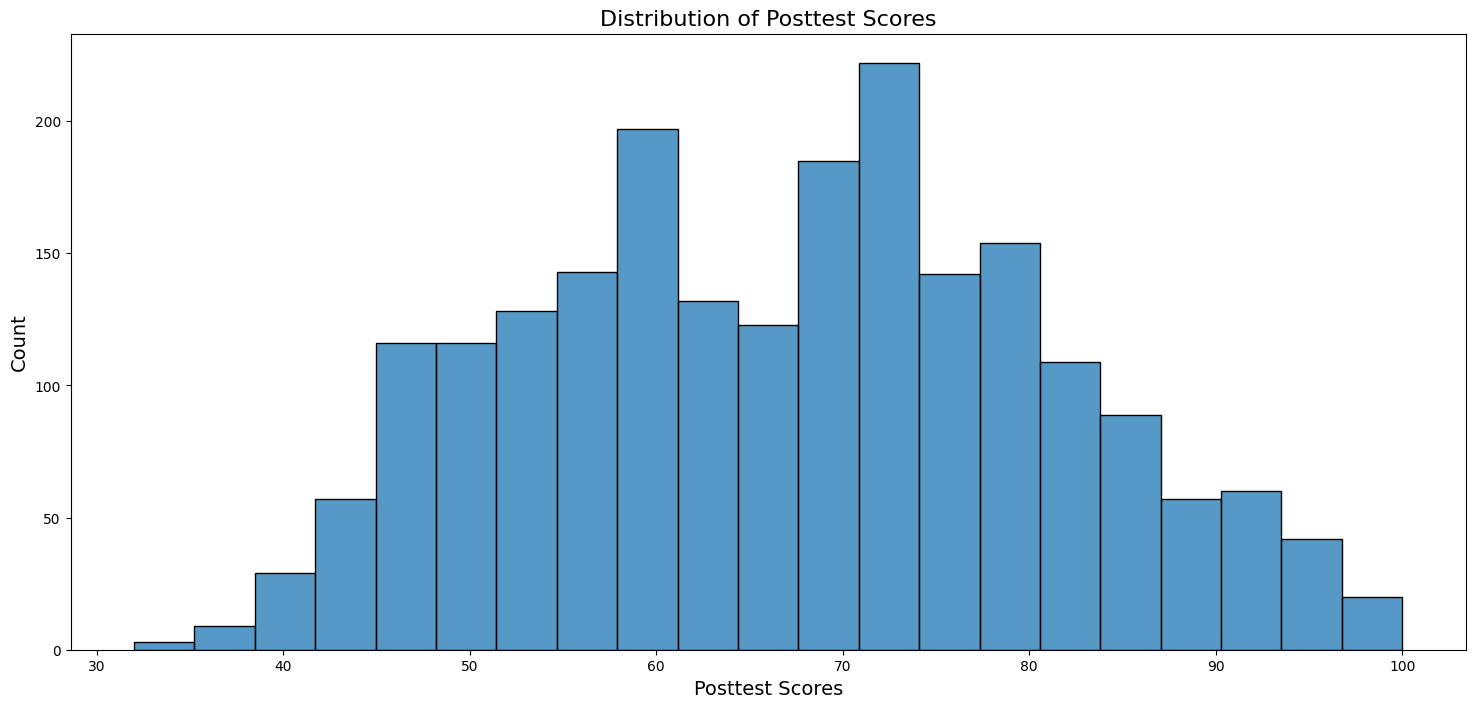

In [ ]:
# Create the plot for pretest scores
fig, ax = plt.subplots(figsize=(18, 8))
sns.histplot(data=test_scores, x='posttest', ax=ax)

# Add labels to the axes
ax.set_xlabel('Posttest Scores', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Posttest Scores', fontsize=16)

# Display the plot
plt.show()

The posttest results range from above 20 points to around 100.

# Dodać opis kolejnej sekcji

In [ ]:
average_scores = test_scores.groupby(['school', 'school_type'])[['pretest', 'posttest']].mean().reset_index() # averaging posttest and pretest results, grouped by school and school type

In [ ]:
best_pretest_schools = average_scores.sort_values(by='pretest', ascending=False)
best_posttest_schools = average_scores.sort_values(by='posttest', ascending=False)

In [ ]:
best_pretest_schools.head()

,school,school_type,pretest,posttest
16,UKPGS,Public,78.453125,91.164062
9,IDGFP,Non-public,75.202128,87.223404
21,ZMNYA,Public,68.130435,81.608696
17,UUUQX,Non-public,67.309524,79.261905
2,CIMBB,Non-public,65.067568,76.945946


The UKPGS school (Public) achieved the highest average pretest score (78.45). The next school, IDGFP (Non-public), also achieved a very high average pretest score (75.20). The top performers include both public and non-public schools, suggesting that a high level of student preparedness can occur regardless of the type of school. However, among the top ten schools, the majority are non-public.

In [ ]:
best_posttest_schools.head()

,school,school_type,pretest,posttest
16,UKPGS,Public,78.453125,91.164062
9,IDGFP,Non-public,75.202128,87.223404
21,ZMNYA,Public,68.130435,81.608696
17,UUUQX,Non-public,67.309524,79.261905
5,FBUMG,Non-public,62.891304,78.608696


The UKPGS school (Public) achieved the highest average posttest score (91.16), suggesting that students at this school significantly improved their results after the period of study. The IDGFP school (Non-public) also achieved a very high average posttest score (87.22). Once again, both public and non-public schools are among the top performers, indicating that a high level of teaching can be achieved regardless of the type of school. Similar to the pretest results, non-public schools also dominate the top ranks.

In [ ]:
average_type_school_scores = test_scores.groupby('school_type')[['pretest', 'posttest']].mean().reset_index() #averaging posttest and pretest results, grouped by school type

In [ ]:
average_type_school_scores

,school_type,pretest,posttest
0,Non-public,63.254083,75.961887
1,Public,52.065740,64.016435


Non-public schools performed better on the test than public schools.

In [ ]:
average_gender_scores = test_scores.groupby(['gender','school_type'])[['pretest', 'posttest']].mean().reset_index() #averaging posttest and pretest results, grouped by gender and school type

In [ ]:
average_gender_scores

,gender,school_type,pretest,posttest
0,Female,Non-public,63.263345,75.854093
1,Female,Public,51.830968,63.796129
2,Male,Non-public,63.244444,76.074074
3,Male,Public,52.291202,64.228005


There are no significant differences in test results when it comes to gender.

In [ ]:
average_teaching_method_scores = test_scores.groupby(['teaching_method'])[['pretest', 'posttest']].mean().reset_index() #averaging posttest and pretest results, grouped by teaching method

In [ ]:
average_teaching_method_scores

,teaching_method,pretest,posttest
0,Experimental,57.055263,72.982895
1,Standard,53.793882,63.847050


The experimental method achieved better results in both tests.

## Data preparation for the model

In [ ]:
new_dataframe_reduced = test_scores.drop(columns=['classroom', 'student_id']) #new data frame without columns classroom and student_id
new_dataframe_reduced.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


Converting categorical variables into separate categories using OneHotEncoding method. One-hot encoding transforms a categorical column by creating n columns, where n is the number of unique values in the column. The number 1 is assigned to the appropriate column for each row, and 0 to the remaining columns that were generated for the categories

In [ ]:
categorical_columns = ['school', 'school_setting', 'school_type', 'teaching_method', 'gender', 'lunch']

In [ ]:
encoder = OneHotEncoder(sparse=False)

In [ ]:
encoded_features = encoder.fit_transform(test_scores[categorical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

In [ ]:
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

In [ ]:
df_encoded = pd.concat([new_dataframe_reduced.drop(columns=categorical_columns), encoded_df], axis=1)

In [ ]:
df_encoded.head()

,n_student,pretest,posttest,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,...,school_setting_Suburban,school_setting_Urban,school_type_Non-public,school_type_Public,teaching_method_Experimental,teaching_method_Standard,gender_Female,gender_Male,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,20.0,62.0,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,20.0,66.0,79.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,20.0,64.0,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,20.0,61.0,77.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,20.0,64.0,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


Normalization of continuous variables using MinMaxScaler in range 0 to 1

In [ ]:
columns_to_normalize = ['pretest', 'n_student']

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df_encoded[columns_to_normalize] = scaler.fit_transform(df_encoded[columns_to_normalize])

In [ ]:
df_encoded.head()

,n_student,pretest,posttest,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,...,school_setting_Suburban,school_setting_Urban,school_type_Non-public,school_type_Public,teaching_method_Experimental,teaching_method_Standard,gender_Female,gender_Male,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,0.352941,0.563380,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.352941,0.619718,79.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.352941,0.591549,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.352941,0.549296,77.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.352941,0.591549,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


Splitting the dataset into a training set and a test set

In [ ]:
y = df_encoded.pop('posttest')
X = df_encoded

In [ ]:
y.shape

(2133,)

In [ ]:
X.shape

(2133, 36)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Dummy Regressor Model

In [ ]:
def train_and_evaluate(model, X_train=X_train, X_test=X_test):

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print('Value of R2 score on train set', r2_train)
    print('Value of R2 score on test set', r2_test)
    print('Value of Mean Absolute Error on train set', mae_train)
    print('Value of Mean Absolute Error on test set', mae_test)


In [ ]:
dummy_regressor = DummyRegressor(strategy='mean')

In [ ]:
train_and_evaluate(dummy_regressor)

Value of R2 score on train set 0.0
Value of R2 score on test set -0.003829151001574882
Value of Mean Absolute Error on train set 11.599767182648923
Value of Mean Absolute Error on test set 11.939521896818228


The R2 score came out negative. The model did not fit the data. The model is off by 12 points.

# Linear Regression

In [ ]:
model = LinearRegression() #Linear Regression model

In [ ]:
results = train_and_evaluate(model)

Value of R2 score on train set 0.9493332177204439
Value of R2 score on test set 0.9525362269503888
Value of Mean Absolute Error on train set 2.487619523007034
Value of Mean Absolute Error on test set 2.468134788495316


In the case of linear regression, the model is off by about 2.5 points on both the training and test sets.

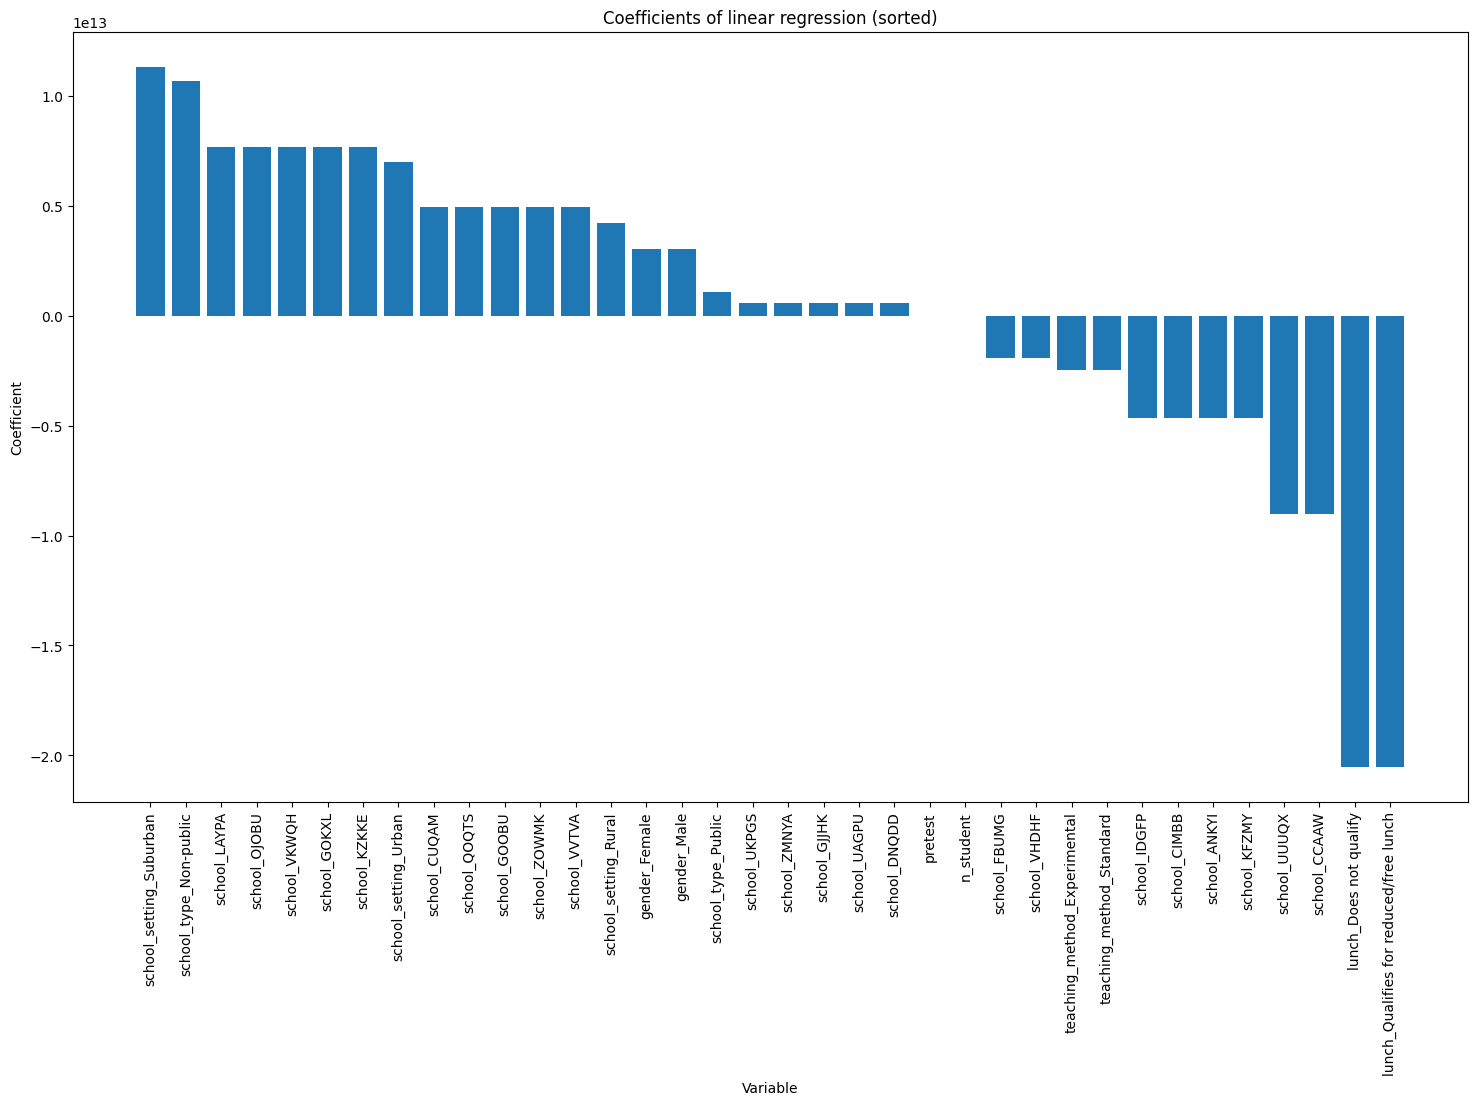

In [ ]:
# Retrieving the coefficients
coef = model.coef_

#Sorting variables by coefficient value
sorted_indices = coef.argsort()[::-1]
sorted_columns = X_train.columns[sorted_indices]
sorted_coef = coef[sorted_indices]

# Creating a plot
plt.figure(figsize=(18, 10))

# Visualization of coefficients
plt.bar(sorted_columns, sorted_coef)
plt.xlabel('Variable')
plt.ylabel('Coefficient')
plt.title("Coefficients of linear regression (sorted)")

# Displaying the plot
plt.xticks(rotation=90)
plt.show()

In [ ]:
y_test_pred = model.predict(X_test)
errors = y_test - y_test_pred

In [ ]:
np.var(errors)

9.710934305955478

In [ ]:
np.mean(y_test_pred) - np.mean(y_test)

-0.06898830869437234

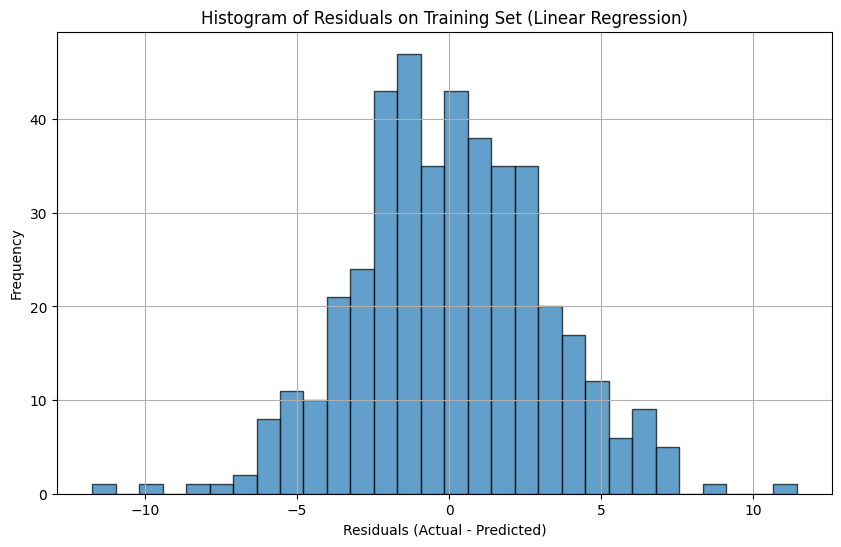

In [ ]:
# Plotting the histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals on Training Set (Linear Regression)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The errors are practically symmetrically distributed around zero. This indicates that the model does not have systematic tendencies to overestimate or underestimate. The distribution of errors is close to a normal distribution, which may suggest that the model fits the data well.

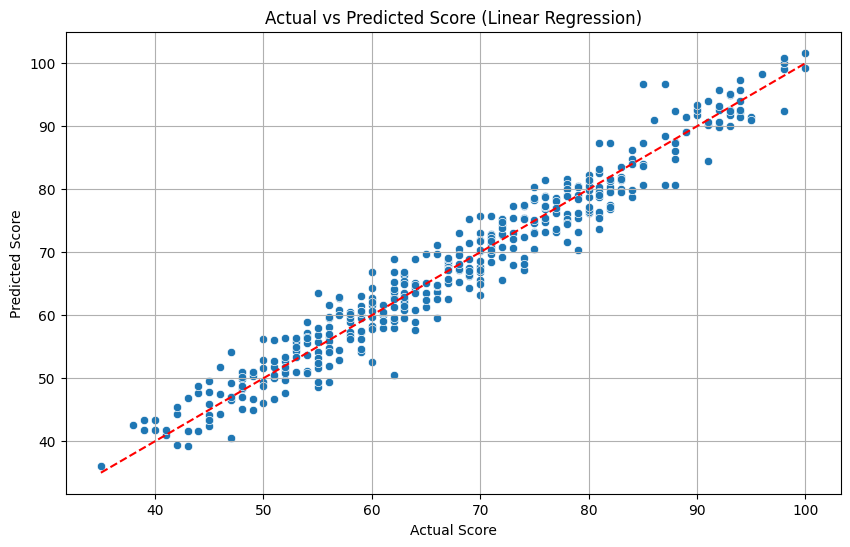

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line for reference
plt.title('Actual vs Predicted Score (Linear Regression)')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.grid(True)
plt.show()

Most of the points are close to the red line, which may indicate that the model predicts the outcomes well. We also observe deviations around the 85-point mark.

In [ ]:
error_df = pd.DataFrame({"Score": y_test, 'Residuals': errors})

mae_per_score = error_df.groupby("Score").apply(lambda x: np.abs(x['Residuals']))
mae_per_score_sorted = mae_per_score.sort_values(ascending=False)
mae_per_score

Score      
35.0   746     0.989258
38.0   742     4.583008
39.0   1017    4.364258
       749     2.801758
40.0   761     1.750977
                 ...   
98.0   910     2.051758
       914     2.881836
       1487    5.608398
100.0  911     1.661133
       905     0.831055
Name: MAE per Score, Length: 427, dtype: float64

# Support Vector Machine Models



In [ ]:
svm_regressor = SVR() #The SVM model

In [ ]:
results_svr = train_and_evaluate(svm_regressor)

Value of R2 score on train set 0.8793837241336832
Value of R2 score on test set 0.8895525973738492
Value of Mean Absolute Error on train set 3.784185200165324
Value of Mean Absolute Error on test set 3.776509886142108


In [ ]:
%%time
svm_regressor = SVR(kernel='linear') #The SVM model with a linear kernel

train_and_evaluate(svm_regressor)

Value of R2 score on train set 0.9414933685977418
Value of R2 score on test set 0.9460061545663323
Value of Mean Absolute Error on train set 2.649182082409328
Value of Mean Absolute Error on test set 2.6290651118175816
CPU times: user 465 ms, sys: 0 ns, total: 465 ms
Wall time: 824 ms


In [ ]:
%%time
svm_regressor = LinearSVR()

train_and_evaluate(svm_regressor)

Value of R2 score on train set 0.9429675798687034
Value of R2 score on test set 0.9474897097382048
Value of Mean Absolute Error on train set 2.614778227659063
Value of Mean Absolute Error on test set 2.5872800121772257
CPU times: user 22.8 ms, sys: 7.36 ms, total: 30.2 ms
Wall time: 30.3 ms


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [ ]:
svm_regressor = SVR(kernel='poly', degree=2) #The SVM model with a polynomial kernel

train_and_evaluate(svm_regressor)

Value of R2 score on train set 0.9110407102082706
Value of R2 score on test set 0.9182576674398907
Value of Mean Absolute Error on train set 3.2220919472652736
Value of Mean Absolute Error on test set 3.229000780686993


In the case of SVR models, the Linear SVR performed the best. The model is off by 2.6 points.

# Decision trees

In [ ]:
regr = DecisionTreeRegressor() #The Decision Tree model

train_and_evaluate(regr)

Value of R2 score on train set 0.9882720256838772
Value of R2 score on test set 0.9253100021293846
Value of Mean Absolute Error on train set 0.834798749511528
Value of Mean Absolute Error on test set 3.074316939890711


In [ ]:
regr = DecisionTreeRegressor(max_depth=2)

train_and_evaluate(regr)

Value of R2 score on train set 0.8302321636358055
Value of R2 score on test set 0.8176486709512584
Value of Mean Absolute Error on train set 4.619155063782814
Value of Mean Absolute Error on test set 4.971982709243777


In [ ]:
regr = DecisionTreeRegressor(max_depth=4)

train_and_evaluate(regr)

Value of R2 score on train set 0.9302671942213004
Value of R2 score on test set 0.9330290520037854
Value of Mean Absolute Error on train set 2.904811184784885
Value of Mean Absolute Error on test set 2.9484712499518184


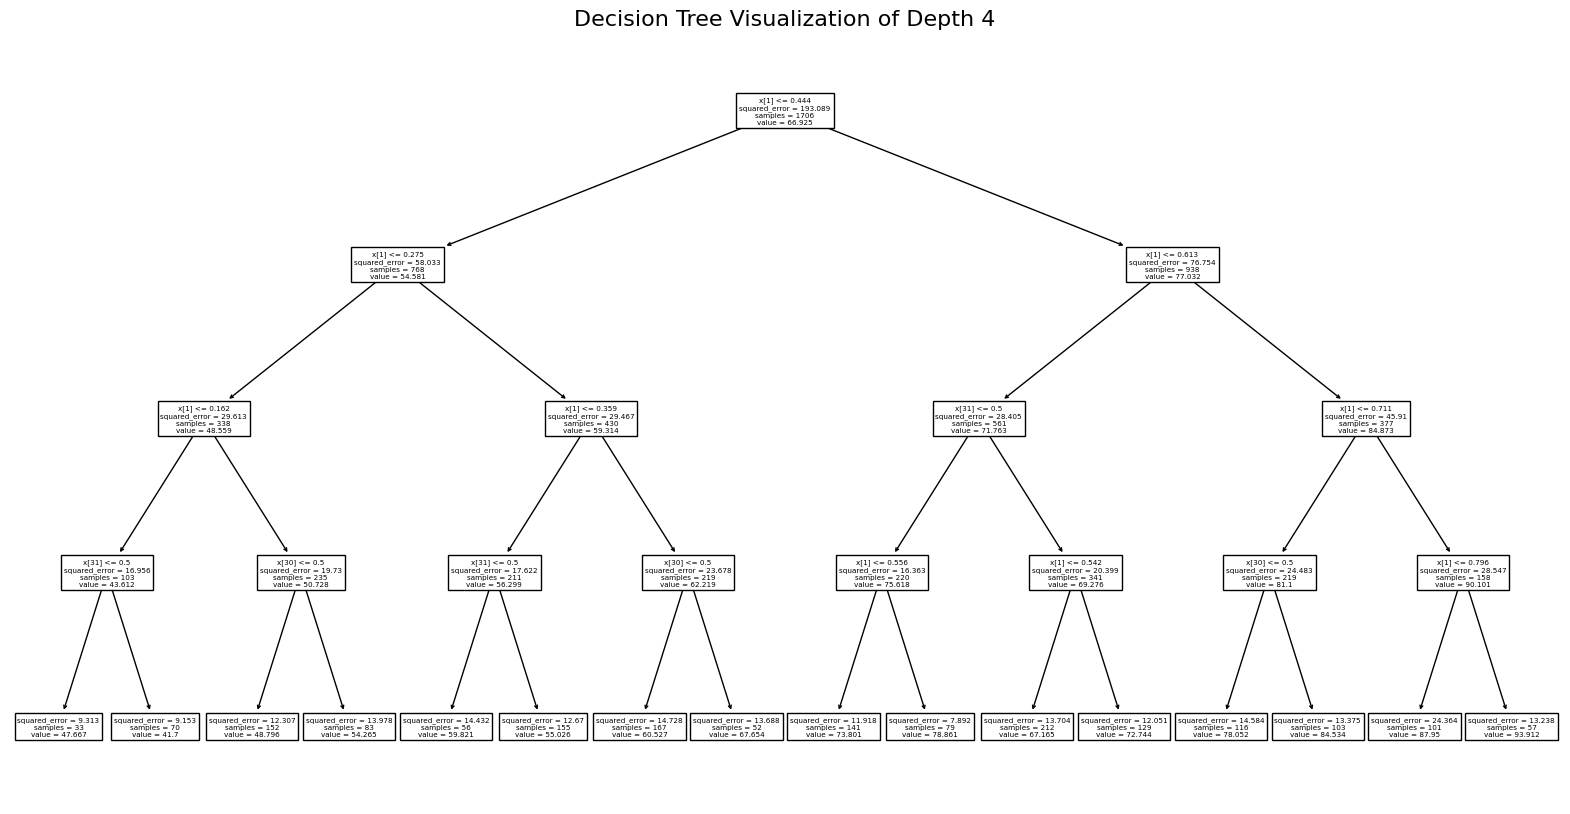

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(regr)

# Adding axis labels
plt.xlabel('Tree Nodes', fontsize=14)
plt.ylabel('Tree Depth', fontsize=14)

# Adding a title to the plot
plt.title('Decision Tree Visualization of Depth 4', fontsize=16)

# Displaying the plot
plt.show()

In [ ]:
regr.feature_importances_ #feature importances

array([0.        , 0.95745904, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01929344, 0.02324753, 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
feat_imp = {X_train.columns[i]: regr.feature_importances_[i] for i in range(len(X_train.columns))}

In [ ]:
feat_imp

{'n_student': 0.0,
 'pretest': 0.9574590367766764,
 'school_ANKYI': 0.0,
 'school_CCAAW': 0.0,
 'school_CIMBB': 0.0,
 'school_CUQAM': 0.0,
 'school_DNQDD': 0.0,
 'school_FBUMG': 0.0,
 'school_GJJHK': 0.0,
 'school_GOKXL': 0.0,
 'school_GOOBU': 0.0,
 'school_IDGFP': 0.0,
 'school_KFZMY': 0.0,
 'school_KZKKE': 0.0,
 'school_LAYPA': 0.0,
 'school_OJOBU': 0.0,
 'school_QOQTS': 0.0,
 'school_UAGPU': 0.0,
 'school_UKPGS': 0.0,
 'school_UUUQX': 0.0,
 'school_VHDHF': 0.0,
 'school_VKWQH': 0.0,
 'school_VVTVA': 0.0,
 'school_ZMNYA': 0.0,
 'school_ZOWMK': 0.0,
 'school_setting_Rural': 0.0,
 'school_setting_Suburban': 0.0,
 'school_setting_Urban': 0.0,
 'school_type_Non-public': 0.0,
 'school_type_Public': 0.0,
 'teaching_method_Experimental': 0.01929343653776493,
 'teaching_method_Standard': 0.023247526685558646,
 'gender_Female': 0.0,
 'gender_Male': 0.0,
 'lunch_Does not qualify': 0.0,
 'lunch_Qualifies for reduced/free lunch': 0.0}

We can see that only 3 features are important for the model: pretest, teaching_method_Experimental and teaching_method_Standard. In the case of decision trees, the best result was achieved by a tree with a depth of 4. In this case, the model is off by about 3 points.

# Summary
In this project, I have conducted a detailed EDA to understand the data and important features. Based on exploratory analysis, I performed data preprocessing and feature engineering. Finally, I train linear regression model, Support Vector MAchines models, Decission Tree models. The best model turned out to be Linear Regression model with MAE 2,5